In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout 
from tensorflow.keras.optimizers import Adam 
from sklearn.metrics import confusion_matrix

In [28]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [29]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [30]:
X_test = X_test.reshape(-1,28,28,1)
X_train = X_train.reshape(-1,28,28,1)

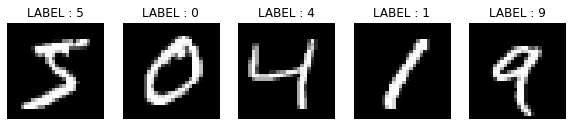

In [31]:
def plot_figures(images,labels,num_samples=5):
    plt.figure(figsize=(10,10))
    for i in range(num_samples):
        plt.subplot(1,num_samples,i+1)
        plt.imshow(images[i].reshape(28,28),cmap='gray')
        plt.title(F'LABEL : {labels[i]}')
        plt.axis('off')

    plt.show()

plot_figures(X_train,y_train)




In [32]:
def lenet_model():
    model = Sequential([
        Conv2D(6, (5,5), activation='relu',input_shape=(28,28,1)),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(16,(5,5),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(120,activation='relu'),
        Dropout(0.5),
        Dense(84,activation='relu'),
        Dense(10,activation='softmax')
    ])

    return model

In [33]:
model = lenet_model()
model.compile(optimizer=Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [34]:
history = model.fit(X_train,y_train,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 9s 10ms/step - loss: 0.3687 - accuracy: 0.8852 - val_loss: 0.0822 - val_accuracy: 0.9742
Epoch 2/10
750/750 [==============================] - 7s 9ms/step - loss: 0.1150 - accuracy: 0.9654 - val_loss: 0.0697 - val_accuracy: 0.9795
Epoch 3/10
750/750 [==============================] - 7s 10ms/step - loss: 0.0877 - accuracy: 0.9741 - val_loss: 0.0519 - val_accuracy: 0.9859
Epoch 4/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0710 - accuracy: 0.9786 - val_loss: 0.0481 - val_accuracy: 0.9863
Epoch 5/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0628 - accuracy: 0.9810 - val_loss: 0.0469 - val_accuracy: 0.9866
Epoch 6/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0556 - accuracy: 0.9839 - val_loss: 0.0457 - val_accuracy: 0.9882
Epoch 7/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0498 - accuracy: 0.9846 - val_loss: 0.0400 - val_accuracy: 0.9886
Epo

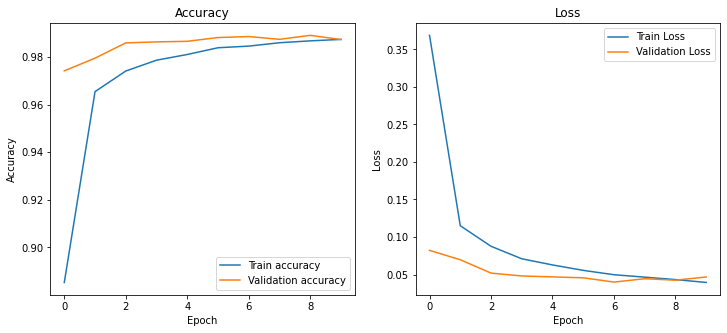

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [36]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print(f'Test accuracy {test_accuracy}')
print(f'Test loss: {test_loss}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0372 - accuracy: 0.9894
Test accuracy 0.9894000291824341
Test loss: 0.037160493433475494


313/313 [==============================] - 1s 3ms/step


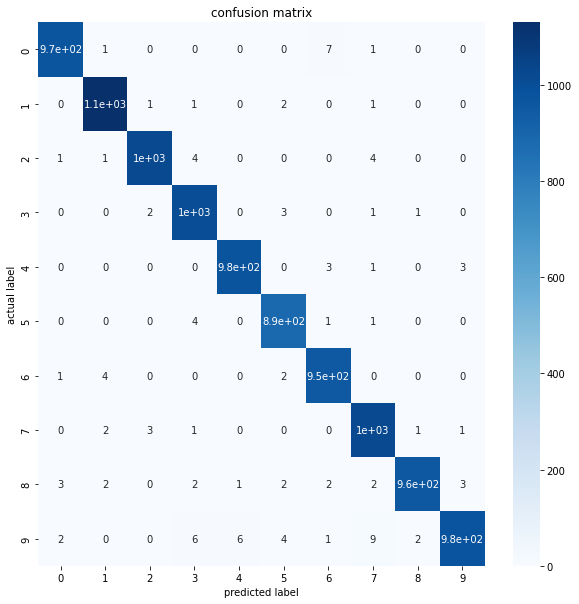

In [42]:
y_pred = np.argmax(model.predict(X_test),axis=-1)
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.title('confusion matrix')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.show()